In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

In [3]:
songs_scaled_1000 = pd.read_csv("audio_features_scaled_1000.csv", index_col = ["name", "artist"])
songs_scaled_1000.head()

,,danceability,energy,key,acousticness,valence,tempo,loudness,speechiness,instrumentalness,liveness,duration_ms,mode,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.388299,-0.093112,1.368799,1.098048,1.666362,-1.300917,-0.348378,1.661874,-0.000755,0.231523,-1.013770,1.0,0.75
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.210312,-0.877303,-1.173788,-0.047460,0.411614,0.376602,-0.397027,-0.162618,-0.000740,-0.097952,-0.086380,1.0,0.75
Smoke Gets In Your Eyes,The Platters,-1.136000,-0.948270,-0.608769,1.266269,-0.863989,-0.030729,-0.445459,-0.339118,-0.000297,4.443455,-0.664191,1.0,0.75
"What'd I Say, Pt. 1 & 2",Ray Charles,0.004942,0.662692,-0.326259,0.903124,1.117192,-0.850106,0.378324,0.051562,-0.000795,0.391808,0.637702,1.0,0.75
Dream A Little Dream Of Me,Ella Fitzgerald,-0.382978,-1.161173,-1.456298,1.196844,-0.238353,-1.238292,-0.505243,0.509668,-0.000795,0.489760,-0.422746,1.0,0.75


In [9]:
# 1. initialize the model
my_kmeans = KMeans(n_clusters = 4)

In [10]:
# 2. fit the model to the data
my_kmeans.fit(songs_scaled_1000) # pass your scaled data here

KMeans(n_clusters=4)

In [12]:
# 3. obtain the cluster output
clusters = my_kmeans.predict(songs_scaled_1000) # pass your scaled data here

In [13]:
# 4. attach the cluster output to our original DataFrame
songs_scaled_1000["cluster"] = clusters

In [17]:
songs_scaled_1000.sample(5)

,,danceability,energy,key,acousticness,valence,tempo,loudness,speechiness,instrumentalness,liveness,duration_ms,mode,time_signature,cluster
name,artist,,,,,,,,,,,,,,
There Will Never Be Another You,Lester Young,0.224003,-1.616429,-1.456298,1.357055,-0.453850,-1.007855,-0.973459,0.234011,5.151005,-0.017809,-0.243666,0.0,0.75,0
Ace of Spades,Motörhead,-0.958013,1.702365,-0.608769,-1.252106,-0.829231,0.810515,0.018324,1.721368,-0.000056,-0.245770,-0.580501,0.0,0.75,1
Mr. Blue,The Fleetwoods,-0.752644,-1.438301,-0.326259,1.231557,-0.909174,-0.587708,-0.922757,-0.249876,-0.000752,-0.062333,-0.769900,1.0,0.75,1
Youngblood,5 Seconds of Summer,0.260513,1.276560,0.521270,-1.209255,-1.114243,0.159013,0.413568,8.226078,-0.000795,0.053428,-0.263217,0.0,0.75,2
There's Nothing Holdin' Me Back,Shawn Mendes,1.451657,1.084948,-0.891279,-0.237043,1.715022,0.213505,0.530216,0.200297,-0.000795,-0.237756,-0.297798,1.0,0.75,1


In [18]:
songs_scaled_1000.groupby("cluster").mean()

,danceability,energy,key,acousticness,valence,tempo,loudness,speechiness,instrumentalness,liveness,duration_ms,mode,time_signature
cluster,,,,,,,,,,,,,
0,-0.975170,-0.946895,0.002794,0.927847,-0.921794,-0.242276,-1.140540,-0.058013,5.111407,0.452002,1.063507,0.593870,0.694444
1,0.161188,0.148319,0.000938,-0.125160,0.235571,0.050721,-0.048476,0.181895,0.143055,0.512201,0.065704,0.686891,0.726706
2,0.804391,0.758133,0.049980,-0.797723,0.381350,0.160265,0.295558,4.368587,0.146537,0.545826,-0.001478,0.635514,0.750000
3,-1.580881,-1.238082,-0.292627,1.049221,-1.391741,-0.425682,-1.353704,-0.008594,4.770738,0.370246,9.096225,0.714286,0.660714


In [28]:
centroids = my_kmeans.cluster_centers_
songs_centroids = pd.DataFrame(centroids, columns = songs_scaled_1000.columns[:-1])
songs_centroids

,danceability,energy,key,acousticness,valence,tempo,loudness,speechiness,instrumentalness,liveness,duration_ms,mode,time_signature
0,-0.975170,-0.946895,0.002794,0.927847,-0.921794,-0.242276,-1.140540,-0.058013,5.111407,0.452002,1.063507,0.593870,0.694444
1,0.161188,0.148319,0.000938,-0.125160,0.235571,0.050721,-0.048476,0.181895,0.143055,0.512201,0.065704,0.686891,0.726706
2,0.804391,0.758133,0.049980,-0.797723,0.381350,0.160265,0.295558,4.368587,0.146537,0.545826,-0.001478,0.635514,0.750000
3,-1.580881,-1.238082,-0.292627,1.049221,-1.391741,-0.425682,-1.353704,-0.008594,4.770738,0.370246,9.096225,0.714286,0.660714


In [32]:
euclidean_dist = pd.DataFrame(pairwise_distances(songs_centroids), index = songs_centroids.index, 
                                                 columns = songs_centroids.index)
euclidean_dist

,0,1,2,3
0,0.000000,5.654078,7.639956e+00,8.094380
1,5.654078,0.000000,4.350766e+00,10.678403
2,7.639956,4.350766,8.429370e-08,11.948489
3,8.094380,10.678403,1.194849e+01,0.000000


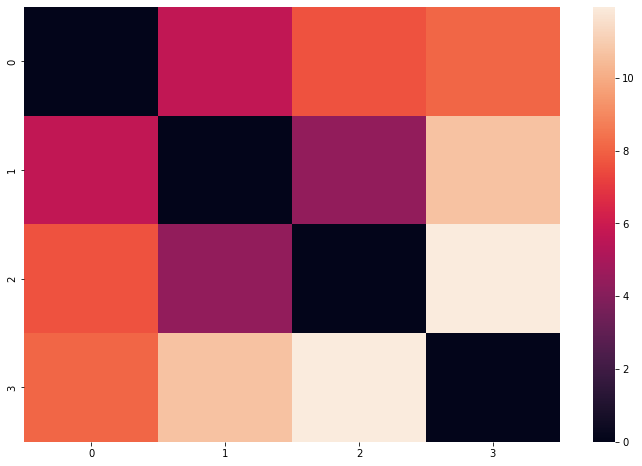

In [33]:
plt.subplots(figsize = (12, 8))
sns.heatmap(euclidean_dist)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [36]:
songs_scaled_1000.groupby("cluster").count()

,danceability,energy,key,acousticness,valence,tempo,loudness,speechiness,instrumentalness,liveness,duration_ms,mode,time_signature
cluster,,,,,,,,,,,,,
0,261,261,261,261,261,261,261,261,261,261,261,261,261
1,923,923,923,923,923,923,923,923,923,923,923,923,923
2,214,214,214,214,214,214,214,214,214,214,214,214,214
3,42,42,42,42,42,42,42,42,42,42,42,42,42


In [44]:
myKMeans = KMeans(n_clusters = 2)
myKMeans.fit(songs_scaled_1000)
myKMeans.inertia_

19940.994548595714

In [45]:
silhouette_score(songs_scaled_1000, myKMeans.labels_)

0.40682969780908407

In [46]:
inertia_list = []
for i in range(1, 30):
    myKMeans = KMeans(n_clusters = i)
    myKMeans.fit(songs_scaled_1000)
    inertia_list.append(round(myKMeans.inertia_))
inertia_list

[29124,
 19941,
 16498,
 13814,
 12238,
 11232,
 10295,
 9814,
 9353,
 9047,
 8685,
 8380,
 8181,
 7926,
 7685,
 7528,
 7312,
 7153,
 6950,
 6881,
 6776,
 6634,
 6475,
 6388,
 6227,
 6187,
 6120,
 6036,
 5966]

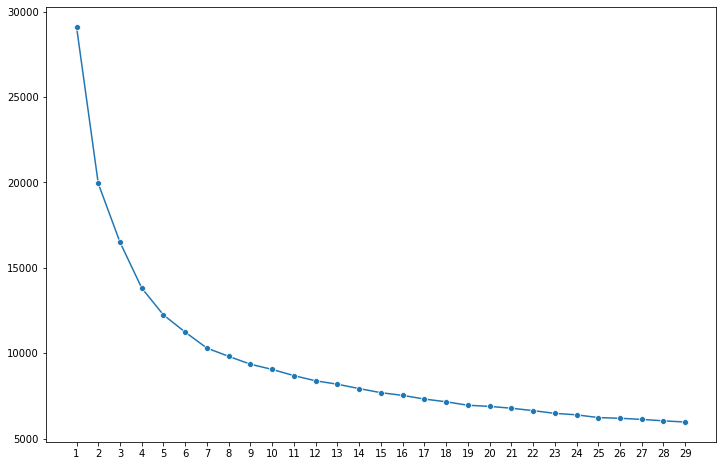

In [53]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(x = range(1, 30), y = inertia_list, marker = "o")
ax.set_xticks(range(1, 30));

In [52]:
sil_score_list = []
for i in range(2, 30):
    myKMeans = KMeans(n_clusters = i)
    myKMeans.fit(songs_scaled_1000)
    sil_score_list.append(silhouette_score(songs_scaled_1000, myKMeans.labels_))
sil_score_list

[0.40682969780908407,
 0.3168875016333517,
 0.33339007271885807,
 0.24097020003408423,
 0.24698819050100893,
 0.2499210746263373,
 0.24690569889596506,
 0.20229728389778417,
 0.18882200417669665,
 0.17527508104965112,
 0.17594084112038497,
 0.1679809764960975,
 0.15180405280674084,
 0.15076161150338965,
 0.14884687133041288,
 0.142188006117162,
 0.17172112677768572,
 0.1491521919175765,
 0.15044104025014654,
 0.14889279736184738,
 0.14229480812687204,
 0.14561229168411435,
 0.1468076900298212,
 0.1439714991322311,
 0.14315381744228345,
 0.14182672352272654,
 0.14324905926945344,
 0.14688951905499942]

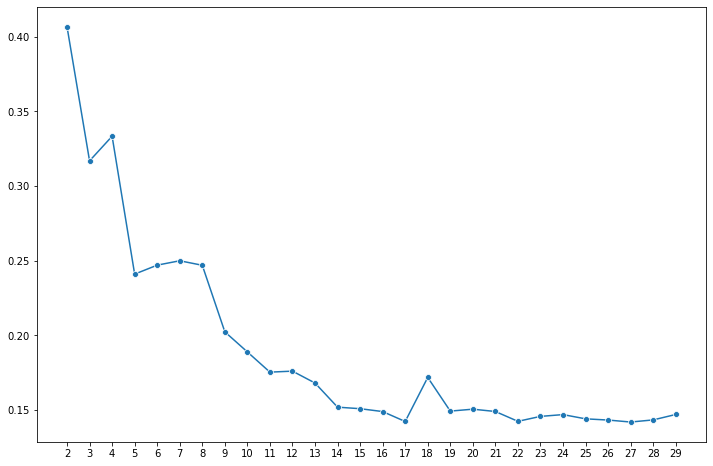

In [55]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(x = range(2, 30), y = sil_score_list, marker = "o")
ax.set_xticks(range(2, 30));